## Jubilee Data Project

In [21]:
import unicodecsv
from collections import OrderedDict

with open('videodata.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    videos = list(reader)

In [27]:
print(videos[0]['video_created'])
print(videos[1]['video_created'])
print(videos[2]['video_created'])

print(videos[0]['% subscriber conversion'])
print(videos[1]['% subscriber conversion'])
print(videos[2]['% subscriber conversion'])

2017-05-07 00:00:00
2017-05-14 00:00:00
2017-05-16 00:00:00
0.0015229999999999998
0.00124
0.002099


In [23]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%m/%d/%Y')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_float(f):
    if f == '':
        return None
    else:
        return float(f.replace(',',''))

# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_int(i):
    if i == '':
        return None
    else:
        return int(i.replace(',',''))
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.

def parse_percentage(p):
    if p == '':
        return None
    else:
        return float(p.strip('%'))/100

In [24]:
## Cleanup on extra rows that are not needed

for v in videos:
    v.pop('clicks_per_card_shown',None)
    v.pop('clicks_per_card_teaser_shown',None)
    v.pop('clicks_per_end_screen_element_shown',None)
    v.pop('subscriber conversion',None)
    v.pop("",None)

In [25]:
# TODO

# Clean up the data types in the video table
for video in videos:
    video['video_length_minutes'] = parse_float(video['video_length_minutes'])    
    video['video_created'] = parse_date(video['video_created'])
    video['views'] = parse_int(video['views'])
    video['subscribers_gained'] = parse_int(video['subscribers_gained'])
    video['% subscriber conversion'] = parse_percentage(video['% subscriber conversion'])
    video['average_view_duration'] = parse_float(video['average_view_duration'])
    video['watch_time_minutes'] = parse_int(video['watch_time_minutes'])
    video['% average_percentage_viewed'] = parse_percentage(video['% average_percentage_viewed'])
    video['card_clicks'] = parse_int(video['card_clicks'])
    video['cards_shown'] = parse_int(video['cards_shown'])
    video['% clicks_per_card_shown'] = parse_percentage(video['% clicks_per_card_shown'])
    video['card_teaser_clicks'] = parse_int(video['card_teaser_clicks'])
    video['card_teasers_shown'] = parse_int(video['card_teasers_shown'])
    video['% clicks_per_card_teaser_shown'] = parse_percentage(video['% clicks_per_card_teaser_shown'])
    video['end_screen_elements_shown'] = parse_int(video['end_screen_elements_shown'])
    video['end_screen_element_clicks'] = parse_int(video['end_screen_element_clicks'])
    video['% clicks_per_end_screen_element_shown'] = parse_percentage(video['% clicks_per_end_screen_element_shown'])
    video['estimated_monetized_playbacks'] = parse_int(video['estimated_monetized_playbacks'])
    video['ad_impressions'] = parse_int(video['ad_impressions'])
    video['youtube_red_watch_time_hours'] = parse_int(video['youtube_red_watch_time_hours'])
    video['annotation_clicks'] = parse_int(video['annotation_clicks'])
    video['clickable_annotations_shown'] = parse_int(video['clickable_annotations_shown'])
    
    ## Potential Weird Behavior bc no % sign
    video['annotation_click_through_rate'] = parse_float(video['annotation_click_through_rate'])
    
    video['annotation_closes'] = parse_int(video['annotation_closes'])
    video['closable_annotations_shown'] = parse_int(video['closable_annotations_shown'])
    video['annotation_close_rate'] = parse_float(video['annotation_close_rate'])
    video['annotations_shown'] = parse_int(video['annotations_shown'])
    video['likes'] = parse_int(video['likes'])
    video['likes_added'] = parse_int(video['likes_added'])
    video['likes_removed'] = parse_int(video['likes_removed'])
    video['dislikes'] = parse_int(video['dislikes'])
    video['dislikes_added'] = parse_int(video['dislikes_added'])
    video['dislikes_removed'] = parse_int(video['dislikes_removed'])
    video['shares'] = parse_int(video['shares'])
    video['comments'] = parse_int(video['comments'])
    video['videos_in_playlists'] = parse_int(video['videos_in_playlists'])
    video['videos_added_to_playlists'] = parse_int(video['videos_added_to_playlists'])
    video['videos_removed_from_playlists'] = parse_int(video['videos_removed_from_playlists'])
    video['average_percentage_viewed'] = parse_percentage(video['average_percentage_viewed'])
    video['watch_time_hours'] = parse_int(video['watch_time_hours'])


In [28]:
videos[0]

OrderedDict([('video_title', '100 Humans: What Do You Love About Yourself?'),
             ('video_id', 'CJN-D6kdvws'),
             ('series', '100 Humans'),
             ('video_length_minutes', 2.47),
             ('video_created', datetime.datetime(2017, 5, 7, 0, 0)),
             ('views', 104404),
             ('subscribers_gained', 159),
             ('% subscriber conversion', 0.0015229999999999998),
             ('average_view_duration', 1.8),
             ('watch_time_minutes', 191746),
             ('% average_percentage_viewed', 0.7445999999999999),
             ('card_clicks', 2),
             ('cards_shown', 5),
             ('% clicks_per_card_shown', 0.4),
             ('card_teaser_clicks', 5),
             ('card_teasers_shown', 3246),
             ('% clicks_per_card_teaser_shown', 0.0015),
             ('end_screen_elements_shown', 117839),
             ('end_screen_element_clicks', 3454),
             ('% clicks_per_end_screen_element_shown', 0.029300000000000003),

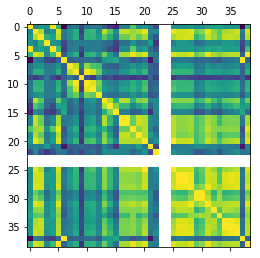

In [33]:
import matplotlib.pyplot as plt
import pandas as pd


df = pd.DataFrame.from_dict(videos)
plt.matshow(df.corr())